[ 0.83333333  0.57913187  0.09463727  0.48798379  0.88390568  0.94305314
  0.41798816  0.20068669  0.51263048  0.13276272  0.05921739  0.01396588
  0.39278864  0.97197047  0.79931331  0.79073905  0.78241498  0.76750715
  0.9351562   0.84020169  0.93458325]
[  3.           4.31683168   4.46534653   8.62376238   3.           4.87128713
  11.62376238   9.86138614   3.18811881   8.37623762   6.3960396
  10.76237624  15.28712871  10.34653465   2.48514851   3.36633663
   4.15841584   9.41584158  11.46534653  11.45544554  11.78217822]
[ 0.83333333  0.57913187  0.09463727  0.48798379  0.88390568  0.94305314
  0.41798816  0.20068669  0.51263048  0.13276272  0.05921739  0.01396588
  0.39278864  0.97197047  0.79931331  0.79073905  0.78241498  0.76750715
  0.9351562   0.84020169  0.93458325]
[  3.           4.31683168   4.46534653   8.62376238   3.           4.87128713
  11.62376238   9.86138614   3.18811881   8.37623762   6.3960396
  10.76237624  15.28712871  10.34653465   2.48514851   3.36633663

<IPython.core.display.Javascript object>


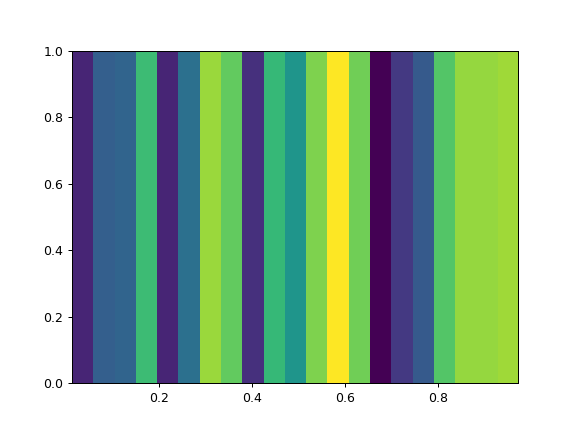

In [31]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


def extents(f):
    delta = f[1] - f[0]
    return [f[0] - delta/2, f[-1] + delta/2]

def circle(theta, omega, K):
    return (theta + omega - K * np.sin(2 * np.pi * theta)) %1

def get_theta_o(theta_o, omega, K):
    theta_start = []
    theta_start.append(theta_o)
    for i in range(100):
        theta_start.append(circle(theta_start[-1], omega, K))
    return theta_start

def wind(theta_o, omega, K):
    nn = []
    theta_start = get_theta_o(theta_o, omega,K)
    for i in range(len(theta_start)):
        theta = theta_start[i]
        theta_curr = theta + 2*e
        n = 0
        while abs(theta_curr  - theta_start[i]) > e and n < 150:
            theta = circle(theta, omega, K)
            theta_curr = theta
            n += 1
        nn.append(n)
    #print('---------')
    return np.mean(nn), theta_curr

def getwind(K, W, theta_o):
    for j in range(len(K)):
        for i in range(len(K[0])):
            k = K[i][j]
            omega = 1/3
            W[i][j], THETA[i][j] = wind(theta_o, omega, k)
            #print('done')
    return W, THETA            
            
theta_o = .5

dx = .05
y = np.arange(0,1+dx,dx)
x = np.arange(0,1+dx,dx)
K, OMEGA = np.meshgrid(x,y)
W = K*0.0 
THETA = K*0.0

W,THETA = getwind(K, W, theta_o)

print(THETA[1][:])
print(W[1][:])

print(THETA[10][:])
print(W[10][:])

plt.imshow(W, extent=(np.amin(THETA), np.amax(THETA), 
                      np.amin(K), np.amax(K)), norm=LogNorm(), aspect = 'auto')


1001


<IPython.core.display.Javascript object>


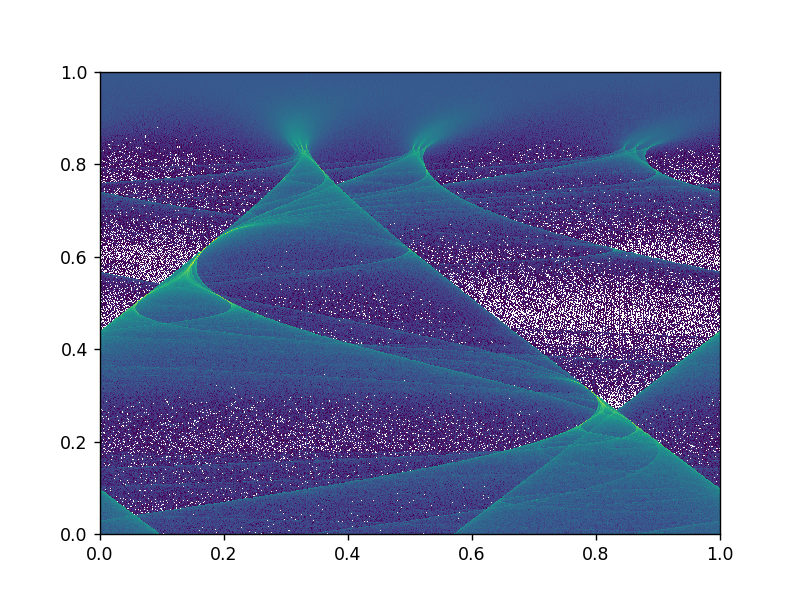

In [80]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


def extents(f):
    delta = f[1] - f[0]
    return [f[0] - delta/2, f[-1] + delta/2]

def circle(theta, omega, K):
    new = (theta + omega - K * np.sin(2 * np.pi * theta)) %1
    return(new)

def getwind(K, W, THETA):
    omega = 1/3
    row = len(THETA)
    col = len(THETA[0])
    for i in range(row):
        k = K[i][0]
        for j in range(col):
            theta = THETA[0][j]
            for kk in range(10):
                theta = circle(theta, omega,k)
                W[i][int(theta*col)] += 1
    return W
            
theta_o = .5

dx = .001
y = np.arange(0,1+dx,dx)
x = np.arange(0,1+dx,dx)
THETA, K = np.meshgrid(x,y)
W = K*0.0 
print(len(W))
W = getwind(K, W, THETA)


plt.imshow(W, extent=(np.amin(THETA), np.amax(THETA), 
                      np.amin(K), np.amax(K)), norm=LogNorm(), aspect = 'auto')


In [63]:
a = [[1,2,4], [5 , 6, 4]]
print(a)
print(len(a[0]))

[[1, 2, 4], [5, 6, 4]]
3


<IPython.core.display.Javascript object>


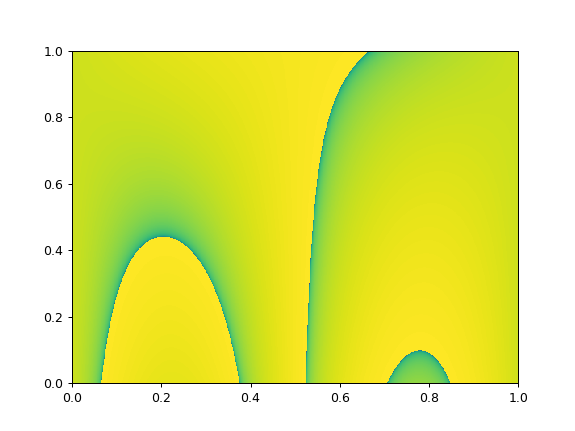

In [45]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


def extents(f):
    delta = f[1] - f[0]
    return [f[0] - delta/2, f[-1] + delta/2]

def circle(theta, omega, K):
    theta2 = (theta + omega - K * np.sin(2 * np.pi * theta)) % 1
    return theta2

def getwind(THETA, K, W, theta_o):
    for j in range(len(K)):
        for i in range(len(K[0])):
            k = K[j][i]
            omega = 1/3
            theta = THETA[j][i]
            W[j][i] = circle(theta, omega, k)
            #print('done')
    return W                

dx = .01
y = np.arange(0,1+dx,dx)
x = np.arange(0,1+dx,dx)
THETA, K = np.meshgrid(x,y)
W = K*0.0 


W = getwind(THETA, K, W, theta_o)


plt.imshow(W, extent=(np.amin(THETA), np.amax(THETA), 
                      np.amin(K), np.amax(K)), norm=LogNorm(), aspect = 'auto')


[[ 0.83333333  0.81028431  0.73571898 ...,  0.14567065  0.90940389
   0.06237086]
 [ 0.83333333  0.81028431  0.73571898 ...,  0.14567065  0.90940389
   0.06237086]
 [ 0.83333333  0.81028431  0.73571898 ...,  0.14567065  0.90940389
   0.06237086]
 ..., 
 [ 0.83333333  0.81028431  0.73571898 ...,  0.14567065  0.90940389
   0.06237086]
 [ 0.83333333  0.81028431  0.73571898 ...,  0.14567065  0.90940389
   0.06237086]
 [ 0.83333333  0.81028431  0.73571898 ...,  0.14567065  0.90940389
   0.06237086]]


<IPython.core.display.Javascript object>


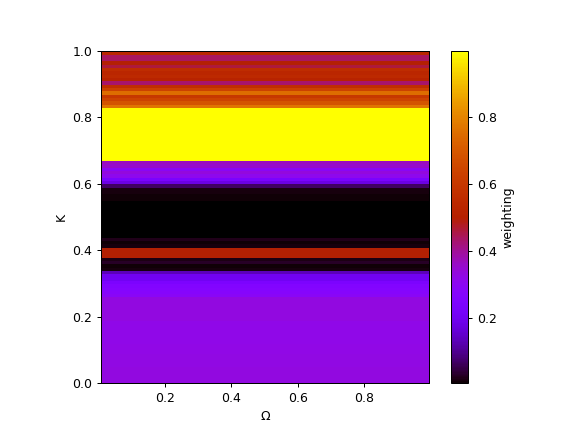

In [19]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

def circle(theta, omega, K):
    return (theta + omega - K * np.sin(2 * np.pi * theta)) 

def wind(theta_o, omega, K):
    n = 0
    theta = theta_o
    nn = []    
    while n < 250:
        theta = circle(theta, omega, K)
        n += 1        
    return (abs(theta - theta_o)/n) % 1, theta %1

def getwind(OMEGA, K, W, theta_o):
    for i in range(len(K)):
        for j in range(len(K[0])):
            k = K[i][j]
            omega = 1/3
            winding, theta = wind(theta_o, omega, k)            
            THETA[i][j] = theta            
            W[i][j] = winding
    return THETA, W            
            
theta_o = .5

dx = .01
y = np.arange(0,1+dx,dx)
x = np.arange(0,1+dx,dx)
THETA, K = np.meshgrid(x,y)
OMEGA = THETA*0.0+1/3
W = OMEGA*0.0 
THETA, W = getwind(THETA, K, W, theta_o)

print(THETA)


cc = plt.pcolormesh(THETA,K,W, cmap ='gnuplot')
plt.axis('scaled')
cbar = plt.colorbar()
plt.xlabel('$\Omega$')
plt.ylabel('K')
cbar.set_label('weighting')

<IPython.core.display.Javascript object>


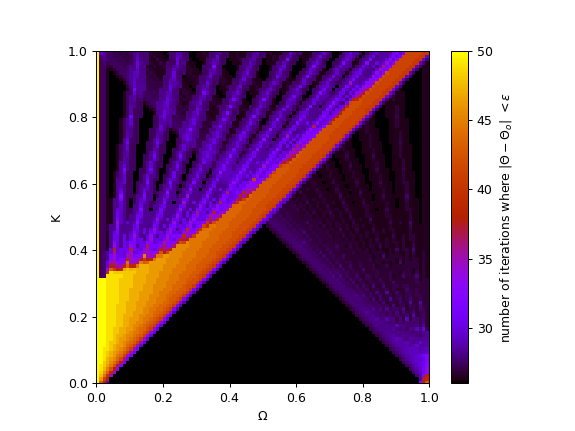

In [22]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

def circle(theta, omega, K):
    return (theta + omega - K * np.sin(2 * np.pi * theta)) %1

def wind(theta_o, omega, K):
    n = 0
    e = .03
    theta_1 = theta_o
    nn = []    
    for i in range(0,51):
        theta_1 = i/50
        theta = theta_1
        while abs(theta  - theta_1 ) < e and n < 50:
            theta = circle(theta, omega, K)
            n += 1
        nn.append(n)
    return np.mean(nn)

def getwind(OMEGA, K, W, theta_o):
    for i in range(len(K)):
        for j in range(len(K[0])):
            k = K[i][j]
            omega = OMEGA[i][j]
            W[i][j] = wind(theta_o, omega, k)
    return W            
            
theta_o = .5

dx = .01
y = np.arange(0,1+dx,dx)
x = np.arange(0,1+dx,dx)
OMEGA, K = np.meshgrid(x,y)
W = OMEGA*0.0 
W = getwind(OMEGA, K, W, theta_o)



cc = plt.pcolormesh(OMEGA,K,W, cmap ='gnuplot')
plt.axis('scaled')

cbar = plt.colorbar()
plt.xlabel('$\Omega$')
plt.ylabel('K')
cbar.set_label('number of iterations where |$\Theta - \Theta_o$| $< \epsilon$')